### This is multi-class text classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Consumer_Complaints.csv')

In [3]:
df.shape

(1157076, 18)

In [4]:
df.sample(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
834104,01/28/2016,Bank account or service,Checking account,Problems caused by my funds being low,NaN,I received a counterfeit check as a deposit fo...,Company chooses not to provide a public response,WELLS FARGO & COMPANY,GA,302XX,NaN,Consent provided,Web,01/28/2016,Closed with monetary relief,Yes,No,1762940
234431,06/29/2017,Checking or savings account,Checking account,Managing an account,Fee problem,"MY COMPLAINT IS SGAINST WELLS FARGO BANK, I HA...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,071XX,Servicemember,Consent provided,Web,06/29/2017,Closed with explanation,Yes,NaN,2562510
713126,06/23/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,NaN,Company disputes the facts presented in the co...,"Firstsource Business Process Services, LLC",CA,92706,NaN,Consent not provided,Web,06/23/2016,Closed with explanation,Yes,No,1981287
551805,04/26/2013,Mortgage,Conventional fixed mortgage,Settlement process and costs,NaN,NaN,NaN,NATIONSTAR MORTGAGE,ID,83402,NaN,NaN,Web,05/08/2013,Closed with explanation,Yes,No,392181
57291,09/12/2018,Mortgage,Other type of mortgage,Applying for a mortgage,NaN,NaN,NaN,RUSHMORE LOAN MANAGEMENT SERVICES LLC,NC,28173,NaN,NaN,Web,09/12/2018,In progress,Yes,NaN,3017621


In [5]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
df.Product.unique()

array(['Mortgage', 'Student loan', 'Credit card or prepaid card',
       'Credit card', 'Debt collection', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Bank account or service', 'Consumer Loan', 'Money transfers',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account', 'Payday loan',
       'Payday loan, title loan, or personal loan',
       'Other financial service', 'Prepaid card', 'Virtual currency'],
      dtype=object)

In [7]:
# there are a couple of label that that have multiple classes assigned
df = df[~df['Product'].str.contains(',')]
df = df[~(df['Product'] == 'Credit card or prepaid card')]
df = df[~(df['Product'] == 'Vehicle loan or lease')]
df = df[~(df['Product'] == 'Checking or savings account')]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900465 entries, 0 to 1157074
Data columns (total 18 columns):
Date received                   900465 non-null object
Product                         900465 non-null object
Sub-product                     665298 non-null object
Issue                           900465 non-null object
Sub-issue                       404771 non-null object
Consumer complaint narrative    225667 non-null object
Company public response         250138 non-null object
Company                         900465 non-null object
State                           891660 non-null object
ZIP code                        840349 non-null object
Tags                            126272 non-null object
Consumer consent provided?      400458 non-null object
Submitted via                   900465 non-null object
Date sent to company            900465 non-null object
Company response to consumer    900462 non-null object
Timely response?                900465 non-null object
Consumer

### We only need 'Product' and 'Consumer complaint narrative' column

In [9]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Student loan,When my loan was switched over to Navient i wa...,0
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha...",1
13,Mortgage,The entire lending experience with Citizens Ba...,1
14,Credit reporting,My credit score has gone down XXXX points in t...,2
42,Debt collection,Today I received a phone call from a number li...,3


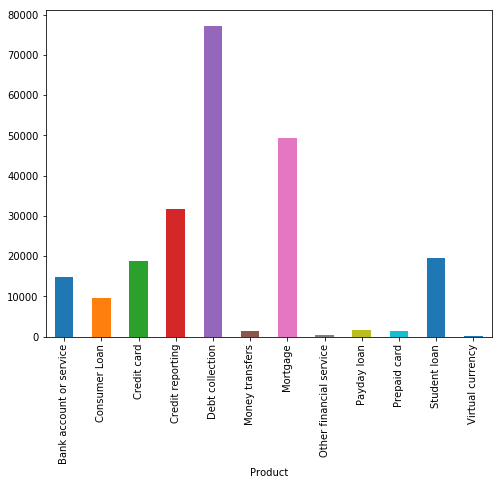

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

#### Imbalanced Classes
<br>We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Debt collection, Credit reporting and Mortgage.

We don’t want the imbalance, our data comes imbalanced and we really wanted to have high accuracy on majority classes (of course, we wanted to predict well on minority classes too if we can achieve both).

If you want to handle this imbalance, there are several strategies: 1).Over-sampling minority classes. 2). Under-sampling majority classes. 3). Use other algorithms.

Thanks

In [11]:
df.Product.nunique()

12

In [12]:
# vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=17000,sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

In [13]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape 

(225667, 17000)

In [14]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. car loan
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. experian
. equifax
  . Most correlated bigrams:
. trans union
. credit report
# 'Debt collection':
  . Most correlated unigrams:
. collection
. debt
  . Most correlated bigrams:
. collect debt
. collection agency
# 'Money transfers':
  . Most correlated unigrams:
. moneygram
. western
  . Most correlated bigrams:
. money transfer
. western union
# 'Mortgage':
  . Most correlated unigrams:
. modification
. mortgage
  . Most correlated bigrams:
. mortgage company
. loan modification
# 'Other financial service':
  . Most correlated unigrams:
. global
. cashing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [16]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


### Model Selection

### We will benchmark the following four models:
<br> Logistic Regression
<br> (Multinomial) Naive Bayes
<br> Linear Support Vector Machine
<br> Random Forest

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


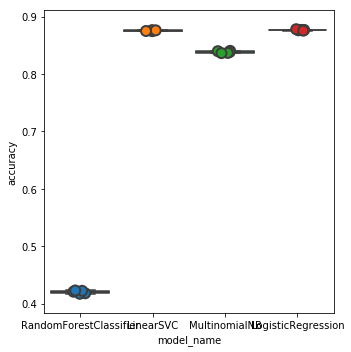

In [30]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.tight_layout()
plt.show()

In [32]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.875587
LogisticRegression        0.876730
MultinomialNB             0.838332
RandomForestClassifier    0.420128
Name: accuracy, dtype: float64

### Model Evaluation - LinearSVC wins!

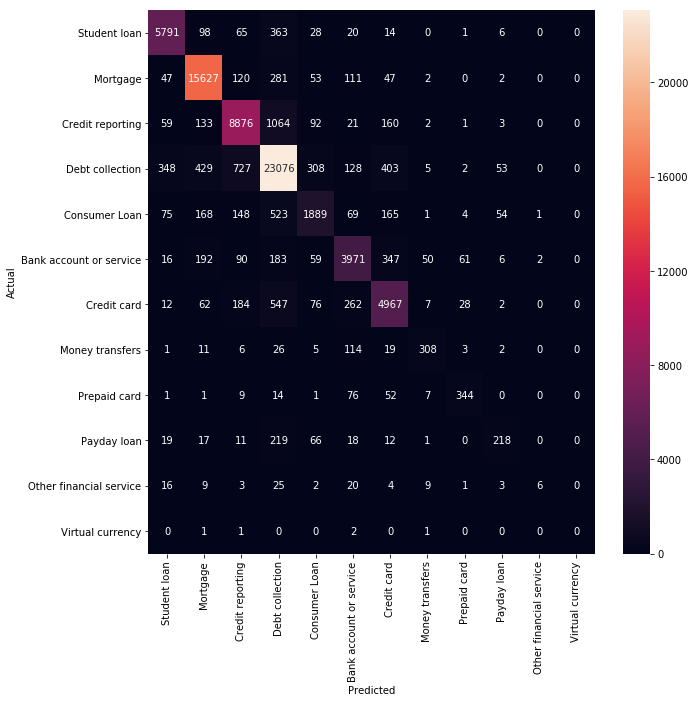

In [33]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Misclassifications

In [21]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Mortgage' predicted as 'Student loan' : 47 examples.


,Product,Consumer_complaint_narrative
120431,Mortgage,I have a loan with THE MONEY SOURCE. I have al...
1129868,Mortgage,Refinanced a commercial loan and trying to pay...
1089739,Mortgage,Why does my interest rate keep increasing and ...
1025016,Mortgage,XXXX XXXX IS A GRANT TO HELP STRUGGLING HOM...
64130,Mortgage,I have a loan with SETERU INC. I have always m...
1013593,Mortgage,I switched from a loan company to it 's parent...
1123216,Mortgage,I took out a mortgage loan with XXXX XXXX XXXX...
176045,Mortgage,I have a loan with XXXX XXXX. I have always ma...
1034049,Mortgage,About six months ago I was considering paying ...
973206,Mortgage,I have a loan with WFHM. I have always made my...



'Credit reporting' predicted as 'Student loan' : 59 examples.


,Product,Consumer_complaint_narrative
980202,Credit reporting,"As per the correspondence, I received from : T..."
1094217,Credit reporting,All XXXX credit bureaus show incorrect reporti...
1112174,Credit reporting,I have student loans that do n't belong to me ...
1053929,Credit reporting,I have the same XXXX loans appearing as duplic...
1058852,Credit reporting,All XXXX credit bureaus show incorrect reporti...
61601,Credit reporting,Late payments are showing on all student loans...
1001667,Credit reporting,i had my student loans dismissed because of my...
1151415,Credit reporting,I have mailed to them letters explaining my po...
68788,Credit reporting,My student loans have always been in Deferment...
1042905,Credit reporting,"On my credit report, my negative accounts are ..."



'Debt collection' predicted as 'Student loan' : 348 examples.


,Product,Consumer_complaint_narrative
630561,Debt collection,XXXX til XXXX incurred debt wIth XXXX now know...
786782,Debt collection,American Education Services/Pheaa recently rep...
1005991,Debt collection,I signed up with equitable acceptance on XX/XX...
421711,Debt collection,I returned the bill to the sender with a note ...
1027939,Debt collection,XXXX was private student loan lender and now I...
980415,Debt collection,XXXX My name is XXXX XXXX Called Navient on XX...
1069700,Debt collection,"I have to many bills, and they are stacking up..."
775572,Debt collection,I have consolidated my student debt with the X...
1063703,Debt collection,"ACS, has been posted inaccurate information. I..."
736508,Debt collection,The debt is from my sister 's education loan f...



'Consumer Loan' predicted as 'Student loan' : 75 examples.


,Product,Consumer_complaint_narrative
1066770,Consumer Loan,"This relates to the "" credit card payment '' m..."
1039501,Consumer Loan,To the Consumer Financial Protection Bureau ; ...
971244,Consumer Loan,Their info and process is not transparent and ...
430643,Consumer Loan,having trouble paying the loan.When I go to se...
144132,Consumer Loan,Through Equitable Acceptance Cooperation I und...
761317,Consumer Loan,I filled out an application for a signature lo...
680058,Consumer Loan,Ameriloan XXXX made me pay XXXX on a XXXX loan...
406311,Consumer Loan,I have been trying to defer payments from bein...
1034475,Consumer Loan,I took out a vehicle registration loan some mo...
1011192,Consumer Loan,I received an advertisement in the mail about ...



'Bank account or service' predicted as 'Student loan' : 16 examples.


,Product,Consumer_complaint_narrative
1041163,Bank account or service,Wells Fargo is refusing to use existing info s...
1045141,Bank account or service,I began corresponding with Charles Schwab two ...
1153790,Bank account or service,I requested a 12 month deferment to for my Nav...
1017093,Bank account or service,I submitted a complaint in XX/XX/XXXX regardin...
1155020,Bank account or service,I am a XXXX XXXX XXXX at the XXXX XXXX Univers...
1092502,Bank account or service,1. Electronic Payments status is complete but ...
1032894,Bank account or service,I fell victim to a student debt relief scam. I...
411947,Bank account or service,1. received email from us dept of education on...
304725,Bank account or service,"To Whom It May Concern, I XXXX XXXX a XXXX vet..."
768565,Bank account or service,see attached. I am sending all info for this s...



'Credit card' predicted as 'Student loan' : 12 examples.


,Product,Consumer_complaint_narrative
1128920,Credit card,Im being charged for something I never receive...
1083598,Credit card,I have had many problems with this bank. First...
543021,Credit card,Synchrony Financial bank locked my account and...
408339,Credit card,I 've been subjected to paying interest on amo...
421414,Credit card,I believe that Citi is inappropriately not all...
1061369,Credit card,I called the credit issuer to request a paymen...
1156294,Credit card,"XXXX XXXX XXXX XXXX XXXX XXXX, New Jersey XXXX..."
1091340,Credit card,"PARDON THE CAPS, BUT I HAVE JUST GOTTEN OFF TH..."
1135323,Credit card,WellsFargo Bank N.A. Credit Card Limit Increas...
1088061,Credit card,yes ive been trying too work out a monthly pay...



'Payday loan' predicted as 'Student loan' : 19 examples.


,Product,Consumer_complaint_narrative
1021761,Payday loan,The company is castlepayday loans. They pull {...
1090855,Payday loan,Despite my repeated requests for them to desis...
1140634,Payday loan,"My loan amount was for {$600.00}, the was {$21..."
1023875,Payday loan,"I keep getting calls, texts and emails about c..."
737061,Payday loan,"Advanced Financial XXXX, TENNESSEE Issues : 1 ..."
313078,Payday loan,XXXX separate loans payed on XXXX separate dat...
1010516,Payday loan,Monkey Key Never Told Me That The Fee They Cha...
1101469,Payday loan,I took out a XXXX $ loan originaly with XXXX $...
1007694,Payday loan,I borrowed {$500.00} initially as a cash advan...
1139312,Payday loan,Outrageous interest rates and unmanageable pay...



'Other financial service' predicted as 'Student loan' : 16 examples.


,Product,Consumer_complaint_narrative
1030710,Other financial service,Financial aid Services was the company that pr...
776765,Other financial service,Student loan scam. Signed up after they promis...
685682,Other financial service,being contacted daily by phone and email from ...
1153983,Other financial service,i recieve a call from the company First Consum...
1115685,Other financial service,I was contacted by fedloan and told they could...
1024153,Other financial service,I was told that I pay them a certain amount an...
1018449,Other financial service,I was making payments to this company in relat...
1153313,Other financial service,"In an attempt to pay down my student loans, th..."
1060861,Other financial service,I am a recent graduate of a XXXX looking for g...
828219,Other financial service,I called a number that I found when I searched...



'Student loan' predicted as 'Mortgage' : 98 examples.


,Product,Consumer_complaint_narrative
1126250,Student loan,Wells Fargo has granted a temporary payment re...
1080024,Student loan,In my previous complaints ( XXXX ) to CFPB the...
175603,Student loan,"After the XXXX transfer to XXXX, attempted to ..."
1062667,Student loan,I originally applied for a XXXX refinance loan...
1050487,Student loan,My payment was due XXXX XXXX XXXX (...
451155,Student loan,"In XXXX XXXX, I contacted Sun Trust with respe..."
802743,Student loan,I 'm a veteran and my gi bill was supposed to ...
1027635,Student loan,I have contact them on various times when I ma...
500298,Student loan,I have sent the forms for the Income Contingen...
65475,Student loan,my loan was in rehab approx. 12 months and I n...



'Credit reporting' predicted as 'Mortgage' : 133 examples.


,Product,Consumer_complaint_narrative
304130,Credit reporting,i can not verfiy my identy on the question so ...
476268,Credit reporting,"In XX/XX/XXXX, I defaulted on XXXX properties ..."
680480,Credit reporting,I have been trying to obtain a Harp Loan for s...
1083310,Credit reporting,i can not verfiy my identy on the question so ...
261306,Credit reporting,"very "" simple '' situation. XXXX XXXX refused ..."
970405,Credit reporting,I am doing mortgage shopping. I applied for pr...
981736,Credit reporting,On XXXX I opened a mortgage with XXXX XXXX XXX...
1046408,Credit reporting,XX/XX/2015 I closed on a home using a conventi...
1033148,Credit reporting,I short saled my house last year located in XX...
387895,Credit reporting,We asked them to remove my sisters accounts of...



'Debt collection' predicted as 'Mortgage' : 429 examples.


,Product,Consumer_complaint_narrative
1004428,Debt collection,I became deliquent on my mortgage as of XXXX X...
150381,Debt collection,I was approved by XXXX XXXX for trial modifica...
967316,Debt collection,XXXX sold my loan to Fay Servicing ( about {$5...
970382,Debt collection,I do n't know if I completed the correct box b...
1113032,Debt collection,There was no option for the issue I am experie...
1017298,Debt collection,Ocwen provided false and or conflicting inform...
998376,Debt collection,A mortgage in my name is being serviced by Fay...
1109406,Debt collection,I do not know who the second round is but I ju...
1078440,Debt collection,"On XXXX XXXX, XXXX, a subsidiary of IndyMac, f..."
1114570,Debt collection,"In XXXX, I sold my home in a short sale. The X..."



'Consumer Loan' predicted as 'Mortgage' : 168 examples.


,Product,Consumer_complaint_narrative
302709,Consumer Loan,I recently pulled my credit report on XXXX/XXX...
749867,Consumer Loan,I request to dispute the payment late for XXXX...
218518,Consumer Loan,BBVA bank is not allowing consumers to leverag...
463083,Consumer Loan,Can not make car payment online or over the ph...
597907,Consumer Loan,I have not paid any payments since XXXX 2008 o...
999897,Consumer Loan,"First of all, I was invited or referred to dif..."
1076985,Consumer Loan,Spring leaf/OneMain XX/XX/XXXX I filed a compl...
1001330,Consumer Loan,I received a solicitation from open road lendi...
982635,Consumer Loan,To The CFPB I refinance my care back in XX/XX/...
969494,Consumer Loan,I 've had excellent credit history and the onl...



'Bank account or service' predicted as 'Mortgage' : 192 examples.


,Product,Consumer_complaint_narrative
512105,Bank account or service,I have a mortgage through Wells Fargo. I lost ...
344549,Bank account or service,I refinanced an existing home loan with Umpqua...
622017,Bank account or service,I sent my XXXX XXXX homeowners ' association p...
271916,Bank account or service,I paid my mortgage via the banks online paymen...
1089981,Bank account or service,XXXX appears to be one of the main co-conspira...
424720,Bank account or service,"Dear CFPB, We are in the process of XXXX and a..."
448115,Bank account or service,I applied for a condo mortgage for a vacation ...
510725,Bank account or service,I applied for a job with Bank of America in XX...
978899,Bank account or service,While searching online to consolidate some loa...
1059093,Bank account or service,A bank fraudently claimed ownership of land th...



'Credit card' predicted as 'Mortgage' : 62 examples.


,Product,Consumer_complaint_narrative
336091,Credit card,they barckleys constantley mess up my website ...
1091995,Credit card,Follow up to Bank of America case of XXXX case.
1137317,Credit card,I had an account with Kay Jewelers and it was ...
1110093,Credit card,I have an XXXX Card. It has a pay in full port...
735420,Credit card,account was used under my name and wells fargo...
1001458,Credit card,I am a XXXX single male whose primary income s...
1072678,Credit card,I have a credit card for our business with 5/3...
1010826,Credit card,"On more than a half dozen occasions, Wells Far..."
1072944,Credit card,Capital One bank took money out of my account ...
1128824,Credit card,the credit card issuer navy federal fabricated...



'Money transfers' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
1139049,Money transfers,"On XXXX XXXX 2016, I had {$86000.00} stolen fr..."
7373,Money transfers,"Recently, my daughter and I settled on a house..."
979702,Money transfers,"On XXXX XXXX, my office ( Home Loan Alliance T..."
999645,Money transfers,I was sold patio furniture by XXXX and I find ...
1073487,Money transfers,I paid by bank wire transfer on XXXX/XXXX/XXXX...
1089026,Money transfers,"Per my conversation with CFPB on XXXX/XXXX/15,..."
1054099,Money transfers,I am trying to use my credit union 's XXXX sol...
1083938,Money transfers,XXXX and XXXX XXXX began receiving phone calls...
1080527,Money transfers,I took out a mortgage in XXXX 2015 and in XXXX...
999802,Money transfers,Lost $ XXXX down payment due to wire fraud. A ...



'Payday loan' predicted as 'Mortgage' : 17 examples.


,Product,Consumer_complaint_narrative
602706,Payday loan,I 'm being harassed by a lender who both charg...
663484,Payday loan,Speedy Cash made a hard inquiry on my credit r...
420388,Payday loan,i had a loan at western finance in XXXX texas....
750683,Payday loan,In XXXX my husband got a probate cash advance ...
1147906,Payday loan,I applied for a loan for {$400.00} to help pay...
1033471,Payday loan,There 's an organization in West Virginia that...
1050807,Payday loan,The lender had agreed in an email not to deduc...
18437,Payday loan,I did not see the correct category so I choose...
1115209,Payday loan,Quicken Loans obtained XXXX ( XXXX ) HARD Inqu...
1024951,Payday loan,Hello my name is XXXX XXXX and I wanted to fil...



'Student loan' predicted as 'Credit reporting' : 65 examples.


,Product,Consumer_complaint_narrative
1071960,Student loan,was sent to prison XXXX
968219,Student loan,I have contacted XXXX XXXX now Navient about a...
1090884,Student loan,EDFINANCIAL is hurting my report in which was ...
708471,Student loan,Citizens ADVERTISES Student Loans starting at ...
467617,Student loan,I have several accounts which are still report...
419511,Student loan,XXXX XXXX XXXX XXXX is showing 90-120 days lat...
1131643,Student loan,"I had a loan through XXXX student loan, and th..."
1001147,Student loan,US DEPT OF EDUCATION has re-aged my account st...
739878,Student loan,"In 2010, my student loans were being transferr..."
972457,Student loan,I have a loan with XXXX. I have always made my...



'Mortgage' predicted as 'Credit reporting' : 120 examples.


,Product,Consumer_complaint_narrative
273602,Mortgage,I NEED HELP IN BUYING A POPERTY. AND WITH MY C...
783496,Mortgage,WellsFargo did not pay XXXX County property ta...
682235,Mortgage,"My name is XXXX XXXX XXXX, XXXX last XXXX of s..."
195347,Mortgage,"Approx. 10 yrs. ago, I filed for bankruptcy. D..."
722354,Mortgage,Bank of American is actively reporting foreclo...
175791,Mortgage,I filed for Chapter XXXX bankruptcy on XXXX/XX...
979322,Mortgage,The judge said what they get is what they get ...
719212,Mortgage,G.E. Retail Bank place in collections # XXXX a...
1023007,Mortgage,I had 4 hard credit inquires in 4 months for t...
979047,Mortgage,Please check all the information the attachment



'Debt collection' predicted as 'Credit reporting' : 727 examples.


,Product,Consumer_complaint_narrative
1151561,Debt collection,On XXXX XXXX XXXX I disputed information on my...
1012786,Debt collection,XXXX XXXX BANK AND CONTINENTAL FINANCE IS TRYI...
786780,Debt collection,"I live in XXXX, but in XX/XX/XXXX I took a tem..."
183610,Debt collection,The option I chose was the best one I could. I...
834460,Debt collection,The unvalidated items listed on my credit repo...
1121474,Debt collection,XXXX has billed me {$480.00} for an account th...
490822,Debt collection,Disputed a collection account on my XXXX credi...
1126740,Debt collection,They reported inaccurate information on my cre...
151457,Debt collection,XXXX bill that is not mine I never lived in NJ...
1039143,Debt collection,"Hello, This bill was paid in full. I had previ..."



'Consumer Loan' predicted as 'Credit reporting' : 148 examples.


,Product,Consumer_complaint_narrative
37304,Consumer Loan,After having XXXX XXXX leases in the past year...
1117668,Consumer Loan,I have received an e-mail from a Prosper that ...
991909,Consumer Loan,I was on XXXX looking at my credit score and I...
973852,Consumer Loan,"I bought a car, a XX/XX/XXXX XXXX, from XXXX i..."
1080689,Consumer Loan,I had a loan with XXXX Greensky XXXX Our bank ...
1104960,Consumer Loan,I have been recently checking my credit report...
1025042,Consumer Loan,I moved to XXXX from XXXX. Someone was using m...
1137327,Consumer Loan,I am writing to submit a complaint about unfai...
1110776,Consumer Loan,I HAVE NO CLUE WHO THIS BANK IS BUT REPORTED A...
1067049,Consumer Loan,XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX dob...



'Bank account or service' predicted as 'Credit reporting' : 90 examples.


,Product,Consumer_complaint_narrative
968620,Bank account or service,"Dear Sir or Madam, While checking my personal ..."
1127075,Bank account or service,I 'm having a problem with capital one bank th...
783819,Bank account or service,I had to wait 20 minutes ( on hold ) just to g...
973173,Bank account or service,My name is XXXX XXXX XXXX and huband name is X...
1051510,Bank account or service,I have inquires in my report about back accoun...
668389,Bank account or service,A certified letter original dispute with Chex ...
1115780,Bank account or service,Banamex USA involuntarily closed my account. I...
758802,Bank account or service,This is in response to company 's reply to cas...
184269,Bank account or service,CHEXSYSTEMS HAS FAILED TO REMOVE ALL NEGATIVE ...
1105519,Bank account or service,Account that I never over drafted to my knowle...



'Credit card' predicted as 'Credit reporting' : 184 examples.


,Product,Consumer_complaint_narrative
1033366,Credit card,I FILED CHAPTER XXXX AND THE CREDIT CARD COMAP...
1060452,Credit card,XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...
1136574,Credit card,"After reviewing my credit report, I 've notice..."
141665,Credit card,I have disputed XXXX accounts that SYNBC has b...
1105549,Credit card,I have disputed the following item below with ...
345218,Credit card,For inaccurate reporting and failing to proper...
783717,Credit card,I have been fighting for a long time to have t...
1040428,Credit card,I had an account with Walmart. The account was...
306230,Credit card,Capitol One reporting outdated information to ...
390378,Credit card,paid off XXXX cards with a settlement now they...



'Payday loan' predicted as 'Credit reporting' : 11 examples.


,Product,Consumer_complaint_narrative
1105997,Payday loan,I 've apply for like XXXX loans just to help m...
446110,Payday loan,XXXX Credit Bureau informed me via CFPB # XXXX...
1101305,Payday loan,I received a {$500.00} loan from Kickstand Len...
372950,Payday loan,I applied for a loan online and in person by s...
81372,Payday loan,I borrowed {$480.00} and now I 'm expected to ...
988989,Payday loan,I went on the website of RISE loans and tried ...
1069052,Payday loan,I was contacted by a company calling themselve...
536981,Payday loan,Lender made an unauthorized hard credit inquir...
1073880,Payday loan,"I received a copies of my XXXX, XXXX, and XXXX..."
978580,Payday loan,Progreso Financiero is Poising my Credit Score...



'Student loan' predicted as 'Debt collection' : 363 examples.


,Product,Consumer_complaint_narrative
344013,Student loan,XX/XX/XXXX To Whom It May Concern : I 'm writi...
328044,Student loan,Kohn Law Firm and XXXX XXXX are debt collector...
1134341,Student loan,There is a third party debt collection company...
6710,Student loan,I claimed bankruptcy and did n't pay the loan ...
1016854,Student loan,"My daughter took out XXXX student loads, which..."
1125029,Student loan,I had a XXXX over the last 3 years and during ...
1001366,Student loan,This in in response to my previous complaint X...
835296,Student loan,"In accordanc e with 10 U.S.C. 1044, I am a ..."
1006799,Student loan,Navient calls every day threatening severe act...
1075605,Student loan,I REPORTED TO XXXX XXXX XXXX THIS IS NOT MY A...



'Mortgage' predicted as 'Debt collection' : 281 examples.


,Product,Consumer_complaint_narrative
734974,Mortgage,My complaint is in reference to a complaint I ...
995943,Mortgage,I have received a third debt validation letter...
1069167,Mortgage,On XX/XX/XXXX I was pre-approved by Third Fede...
1122076,Mortgage,"XXXX XXXX XXXX is the company, i have paid XXX..."
310725,Mortgage,My debt has not been properly calculated. My R...
1124813,Mortgage,Called ID of Robo and Potential Spam calls are...
1092871,Mortgage,XXXX DI TECH Financial LLC XXXX . XXXX ...
715284,Mortgage,"My husband and I lost our jobs in XXXX, 2011 w..."
1148049,Mortgage,Home Point Financial incorrectly reported my a...
974313,Mortgage,I have a negative item on my credit report fro...



'Credit reporting' predicted as 'Debt collection' : 1064 examples.


,Product,Consumer_complaint_narrative
771117,Credit reporting,XXXX MD XXXX WF CRD SVC Attention : XXXX Date ...
992572,Credit reporting,Reporting information from XXXX is incorrect. ...
1042629,Credit reporting,I am a victim of idenity theft.
644703,Credit reporting,I have never applied for credit ever and someo...
988693,Credit reporting,I paid XXXX doctor 's bills for services rende...
969990,Credit reporting,Some company posted a account on credit report...
1149619,Credit reporting,Hello : I am writing this letter because there...
366021,Credit reporting,XXXX XXXX billed the wrong health card for ser...
67761,Credit reporting,I have derogatory mark on my file from XXXX XX...
973570,Credit reporting,I recently checked my XXXX credit report and f...



'Consumer Loan' predicted as 'Debt collection' : 523 examples.


,Product,Consumer_complaint_narrative
1086975,Consumer Loan,I have a personal loan with Wells Fargo. We go...
1059072,Consumer Loan,I file a complaint with CFPB earlier ( Case # ...
1096400,Consumer Loan,zenco collection company calling my place of e...
1085058,Consumer Loan,I have a collection for {$20.00} that was paid...
215409,Consumer Loan,I completed and returned the complaint form an...
1065451,Consumer Loan,"Apply for course with XXXX XXXX XXXX XXXX, req..."
1106321,Consumer Loan,Harley Davidson is calling the office for debt...
685468,Consumer Loan,Upon checking my credit report on XXXX/XXXX/20...
1070119,Consumer Loan,I opened an account with Motor Max Financial i...
982709,Consumer Loan,They continue to call my job phone at least 12...



'Bank account or service' predicted as 'Debt collection' : 183 examples.


,Product,Consumer_complaint_narrative
1040613,Bank account or service,"I put {$100.00}. on my card, they took XXXX, l..."
1077064,Bank account or service,I have reported to the financial institution f...
1013557,Bank account or service,Capital one is continuing to report an account...
1059761,Bank account or service,I forgot that I had a {$20.00} insurance payme...
534099,Bank account or service,XXXX XXXX claims that my account has a pass du...
1032175,Bank account or service,I have been getting calls starting early morni...
757669,Bank account or service,I have run into a problem with Synovus BankXXX...
1039590,Bank account or service,"hsbc needs to clear this off my cr report, thi..."
1012239,Bank account or service,Deposited on XX/XX/XXXX {$860.00} into Bank Of...
1077429,Bank account or service,I am a victim of identity theft and someone st...



'Credit card' predicted as 'Debt collection' : 547 examples.


,Product,Consumer_complaint_narrative
1125065,Credit card,Sears is reporting that I have a {$5300.00} co...
1007077,Credit card,"In XX/XX/2014, I paid off some debt, including..."
804404,Credit card,My daughter and I purchased an adjustable bed ...
1114432,Credit card,I had an account with XXXX and has settled on ...
516797,Credit card,"On XXXX XXXX, 2015 I received a letter from Ta..."
1005877,Credit card,My credit card company ( Mastercard through Ci...
1068995,Credit card,I received a a letter on XXXX/XXXX/2016 advisi...
1060942,Credit card,On XXXX XXXX I visited a dentist to have a XXX...
37059,Credit card,Unresolved account Settlement : As a final res...
829058,Credit card,In 2010 I defaulted on a credit card balance t...



'Money transfers' predicted as 'Debt collection' : 26 examples.


,Product,Consumer_complaint_narrative
496767,Money transfers,I got this letter in the mail that i was a Mys...
366191,Money transfers,Wanted to trade money for an online game but t...
708451,Money transfers,never received first cardss : XXXX : XXXX XXXX
1123205,Money transfers,I bought a XXXX from a woman in XXXX for XXXX....
301392,Money transfers,I was asked If I was interested in making mone...
58229,Money transfers,This is a summary and a full version will be a...
358584,Money transfers,I transferred money to a programmer about a ye...
990402,Money transfers,I have illegally signed up by PayPal Credit. I...
971052,Money transfers,Finances wired to bank account of XXXX XXXX XX...
1012575,Money transfers,PayPal XXXX trying to collect a debt of {$210....



'Prepaid card' predicted as 'Debt collection' : 14 examples.


,Product,Consumer_complaint_narrative
1124843,Prepaid card,Company tried to launch new services and it fa...
1102929,Prepaid card,I disputed a charge of {$100.00} to XXXX XXXX ...
737897,Prepaid card,I purchased XXXX XXXX XXXX card ( issed by inc...
788436,Prepaid card,"My card/account was lock, and according to an ..."
1128171,Prepaid card,I tried logging into my Reloadit Safe account ...
810423,Prepaid card,The company promised free reloads upon initiat...
783333,Prepaid card,had a withdrawal of XXXX on my amex serve card...
480338,Prepaid card,they promised me a XXXX credit comp and i sill...
182203,Prepaid card,"As a victim of identity theft, I discovered th..."
1123672,Prepaid card,Did not authorize the account and customer ser...



'Payday loan' predicted as 'Debt collection' : 219 examples.


,Product,Consumer_complaint_narrative
1071131,Payday loan,I do n't know how much they are charging in fe...
1008026,Payday loan,I paid off the loans last year to a different ...
789625,Payday loan,"I have used this service in the past, it 's be..."
1072179,Payday loan,I took oit a payday loan in 2008 for XXXX doll...
168054,Payday loan,I am getting threatening calls from someone wh...
1130184,Payday loan,This company called me to threaten me with leg...
355761,Payday loan,I 'm not even sure the original company that i...
1123571,Payday loan,Calling me at work for {$1000.00} in fees
1094292,Payday loan,I recently received a statement from a collect...
1011007,Payday loan,I keep getting emails saying I owe money over ...



'Other financial service' predicted as 'Debt collection' : 25 examples.


,Product,Consumer_complaint_narrative
1017581,Other financial service,ON the day both social security and SSI XXXX f...
751132,Other financial service,Calling me on my job and submitting personal i...
1082786,Other financial service,"I find that this company, Riverwalk Debt Solut..."
1073216,Other financial service,I 'd like your intervention in getting the can...
121721,Other financial service,I attempted to exchange euros to dollars at th...
338842,Other financial service,Certegy XXXX XXXX has a file of my name and an...
1075493,Other financial service,XXXX XXXX at XXXX offered to help to improve m...
1005782,Other financial service,My complaint is about TeleChek. I had occasion...
1027080,Other financial service,I went to XXXX in XXXX MS to cash my check my ...
1070277,Other financial service,"I order an item on XXXX, attempted to pay it w..."



'Student loan' predicted as 'Consumer Loan' : 28 examples.


,Product,Consumer_complaint_narrative
1137850,Student loan,I filed a separate complaint about XXXX XXXX c...
1136157,Student loan,I have been making payments on my loan and the...
1080200,Student loan,Been charged XXXX per month for my loan spoke ...
661574,Student loan,The company recently was bought and is transit...
970825,Student loan,I could not get help with payment plans and I ...
181762,Student loan,I have been making all payments on time but fo...
1127552,Student loan,I have set up auto debiting of payments to my ...
1090726,Student loan,My Interest is very high for this loan. It jus...
971488,Student loan,Interest and payments are too high.
99580,Student loan,I got a personal loan out from XXXX XXXX ( now...



'Mortgage' predicted as 'Consumer Loan' : 53 examples.


,Product,Consumer_complaint_narrative
709292,Mortgage,Help! I am a XXXX Veteran and have been unempl...
778181,Mortgage,My load was sold to Specialized Load Servicing...
995365,Mortgage,Bank of America violated Federal Law by not pl...
1006004,Mortgage,Tried paying my entire loan off XXXX times. Th...
1150677,Mortgage,"I have spent a year and a half, and XXXX compl..."
1104643,Mortgage,I have second mortgage with Citibank. The paym...
1033153,Mortgage,CitiFinancial in XXXX locked me into a morage ...
618952,Mortgage,"Good Morning, Back in XX/XX/XXXX, I applied fo..."
994525,Mortgage,"On XXXX XXXX , 2017 ( or about ), I was t..."
1132335,Mortgage,I received an unfair and very upsetting respon...



'Credit reporting' predicted as 'Consumer Loan' : 92 examples.


,Product,Consumer_complaint_narrative
1137296,Credit reporting,In XXXX of 2016 My wife and I went to a car de...
288126,Credit reporting,My complaint involves XXXX XXXX XXXX in XXXX. ...
1121458,Credit reporting,I 've done extended research on how creditors ...
1042823,Credit reporting,Capital one auto finance has been reporting my...
978441,Credit reporting,"While reviewing my EXPERIAN credit report, I n..."
1001120,Credit reporting,The Auto purchased XXXX XXXX XXXX is re- liste...
810347,Credit reporting,An car loan that supposedly was taken out on X...
769548,Credit reporting,I have disputed XXXX accounts on my credit rep...
971415,Credit reporting,XXXX XXXX XXXX is still reporting the reposses...
150405,Credit reporting,I was shopping for a car and the I put in a cr...



'Debt collection' predicted as 'Consumer Loan' : 308 examples.


,Product,Consumer_complaint_narrative
999338,Debt collection,My car loan was due on XXXX XXXX with Regi...
374206,Debt collection,They call me 15 to 30 times a day and keep ask...
1055322,Debt collection,I am being charged four hundred percent intere...
806749,Debt collection,We accidentally missed a payment in XXXX. We a...
33486,Debt collection,Keep trying to collect a debt on a car they to...
1005962,Debt collection,"Hi, my big problem comes from being under Navy..."
1120040,Debt collection,"I am a member of the XXXX XXXX XXXX, and, prio..."
977889,Debt collection,Central Credit Services LLC who works for XXXX...
1022212,Debt collection,I would like to inform you that I continue to ...
250282,Debt collection,I have had a problem with this loan company fr...



'Bank account or service' predicted as 'Consumer Loan' : 59 examples.


,Product,Consumer_complaint_narrative
1108267,Bank account or service,I applied for a used auto loan through usbank....
512511,Bank account or service,Wells Fargo continue to charge me late fees on...
1020315,Bank account or service,At closing it was agreed ( in writing ) I woul...
1060480,Bank account or service,Our insurance company issued a check for colli...
491033,Bank account or service,The issues we have with USAA BANK/CREDIT CARD/...
1038230,Bank account or service,I 've fell behind on my payments with navy fed...
28968,Bank account or service,I live in XXXX and I purchased a car in XXXX X...
1083120,Bank account or service,I was a very happy member of Navy Federal Cred...
259813,Bank account or service,"In an attempt to open an account, I waited the..."
697886,Bank account or service,I have noticed an inquiry on my credit report ...



'Credit card' predicted as 'Consumer Loan' : 76 examples.


,Product,Consumer_complaint_narrative
967937,Credit card,Late Payments Being Reported : 90 days past du...
76013,Credit card,"I went to Conn 's located at XXXX XXXX XXXX, X..."
990726,Credit card,I have a credit card with Capital One. They ma...
822909,Credit card,I spoke to a rep at Bank of America in XXXX an...
983741,Credit card,About 41 monthly payments in on a 60-month rep...
1059405,Credit card,I contacted the customer contact center to dis...
759688,Credit card,I 'm not sure if this is the most appropriate ...
445101,Credit card,I have outstanding debt to AARP Chase Visa Cre...
1020712,Credit card,I have been dealing with Kay Jewelers recently...
211566,Credit card,XXXX XXXX XXXX XX/XX/XXXX USAA/ Consumer Repor...



'Payday loan' predicted as 'Consumer Loan' : 66 examples.


,Product,Consumer_complaint_narrative
309884,Payday loan,Checked my Checking account and noticed I had ...
738156,Payday loan,I keep getting cash net sending me invoices on...
197995,Payday loan,I went to this loan company and i took out a {...
525707,Payday loan,I do n't understand why 745 cash texts me afte...
472347,Payday loan,I obtained the loan for {$5000.00} on XXXX XXX...
86507,Payday loan,The purpose of this complaint is based on a re...
625204,Payday loan,I borrowed XXXX dollars about XX/XX/XXXX from ...
464469,Payday loan,"Dear Madams, dear Sirs, I took a loan of {$200..."
1003543,Payday loan,I applied for a loan XXXX 2014 for car repairs...
50905,Payday loan,Since XX/XX/2015 I started making a small loan...



'Student loan' predicted as 'Bank account or service' : 20 examples.


,Product,Consumer_complaint_narrative
1111098,Student loan,Wells Fargo removed {$3000.00} from my XXXX XX...
1086127,Student loan,"I mailed a post dated check, they held it for ..."
1037811,Student loan,I was contacted by Integrity group with the he...
1080468,Student loan,{$260.00} dollars was charged to a debit card ...
1116913,Student loan,My Granddaughter had me to cosign for her to g...
1116656,Student loan,It appears JPMorgan Chase Bank N.A cancelled a...
1059697,Student loan,I sent in XXXX checks to Wells Fargo Education...
1054115,Student loan,The BANK OF AMEIRICA is collecting a loan ( s ...
1095562,Student loan,Wells Fargo is not treating me fairly or as a ...
1043378,Student loan,I already know what SCS is saying. The check i...



'Mortgage' predicted as 'Bank account or service' : 111 examples.


,Product,Consumer_complaint_narrative
331213,Mortgage,I paid my XX/XX/XXXX mortgage payment of {$100...
383650,Mortgage,I called the local branch on XXXX / XXXX / XX...
1054648,Mortgage,In XX/XX/2017 I closed my home equity morgage ...
168526,Mortgage,I am a XXXX XXXX. One of my clients has author...
806452,Mortgage,Corresponded with US Bank by letter two times ...
1040764,Mortgage,I had a fire in my home due to a lightning str...
357182,Mortgage,Sun Trust Bank denied our home purchase loan a...
71321,Mortgage,We are ready to sell our home and we need a Co...
1133387,Mortgage,I received a bank statement that was a couple ...
1010157,Mortgage,Bank of America has decided to make banking de...



'Credit reporting' predicted as 'Bank account or service' : 21 examples.


,Product,Consumer_complaint_narrative
1116782,Credit reporting,"On XXXX/XXXX/15, a XXXX XXXX XXXX of XXXX XXXX..."
1014258,Credit reporting,I file bankruptcy this was included
1156219,Credit reporting,"BOA are the frauds, theives. I have no idea wh..."
1128150,Credit reporting,my parents mismanaged and froged signatures al...
467511,Credit reporting,I received a 30 and 60 day late notice on my c...
603640,Credit reporting,I received a letter from Citibank stating that...
1038187,Credit reporting,I 've always had a rep payee and they have alw...
1134136,Credit reporting,"Hello, my name is XXXX XXXX XXXX XXXX My mothe..."
527296,Credit reporting,I 'm a vimtiam of identity theft and someone t...
421170,Credit reporting,I WAS A VICTIM OF AN INTERNET SCAM AND I WOULD...



'Debt collection' predicted as 'Bank account or service' : 128 examples.


,Product,Consumer_complaint_narrative
1125556,Debt collection,"Hello, I am in concern with discover XXXX they..."
1113625,Debt collection,TDBank was involve in a lawsuit due to fraud o...
1071110,Debt collection,On XXXX received Notice of Levy from Bank XXXX...
1156231,Debt collection,Took out a bank card for {$200.00}. Forget to ...
1004888,Debt collection,"On XXXX XXXX, 2016, I received a letter from T..."
1112444,Debt collection,I first contacted Bank of America around XX/XX...
1088584,Debt collection,I was XXXX overseas in XXXX and I made a purch...
292958,Debt collection,I orderd some clothes off the internet online ...
1111169,Debt collection,"In 2010, my check book was stolen unknowingly ..."
970005,Debt collection,Continuance of prior complaint XXXX I went thr...



'Consumer Loan' predicted as 'Bank account or service' : 69 examples.


,Product,Consumer_complaint_narrative
983529,Consumer Loan,BB & T MADE A HARD INQUIRE ON MY CREDIT REPORT...
1017336,Consumer Loan,"Having excellent credit, I took out a Line of ..."
1145381,Consumer Loan,Bank shut down my account that was linked to m...
502213,Consumer Loan,"On XXXX XXXX, 2015 I had an appointment at the..."
1130837,Consumer Loan,Chase Financial after contacting several at XX...
1057838,Consumer Loan,"Fifth Third bank has taken funds, via direct d..."
1142401,Consumer Loan,I filed a letter of concern to Wells Fargo Dea...
47782,Consumer Loan,santander bank issued me a over draft acct tha...
1066925,Consumer Loan,PayPal signed me up for a loan when I thought ...
1105624,Consumer Loan,after months of trying to work with USAA to st...



'Credit card' predicted as 'Bank account or service' : 262 examples.


,Product,Consumer_complaint_narrative
997043,Credit card,Citibank Customer Service informed me that acc...
1083619,Credit card,This company misrepresented their terms and ch...
1055773,Credit card,I made an overpayment on my Chase credit card ...
499376,Credit card,can not get a transaction listing from Citi. I...
769724,Credit card,Got a message alert that my phone number had b...
1045504,Credit card,I called Wells fargo Financial credit card ser...
1016348,Credit card,Today 's date : XX/XX/2017 I am a XXXX. I work...
1110593,Credit card,"On XXXX/XXXX/XXXX a "" Small Balance Adjustment..."
240091,Credit card,I have a credit card with Wells Fargo Bank. Pa...
1040142,Credit card,About 6 month ago I applied for a secured Cred...



'Money transfers' predicted as 'Bank account or service' : 114 examples.


,Product,Consumer_complaint_narrative
122229,Money transfers,XXXX chose to charge my checking account indis...
1000947,Money transfers,I used a mobile payment transfer option throug...
1146328,Money transfers,I was transferring money from my home bank to ...
1006141,Money transfers,I have XXXX small business accounts with XXXX....
387619,Money transfers,"On XXXX XXXX, 2015 I submitted a wire transfer..."
1122272,Money transfers,"On XXXX, XXXX, and finally on XXXX I attempted..."
363408,Money transfers,"On Friday XXXX XXXX, 2015, I spoke to a repres..."
477067,Money transfers,I made a transfer from my Bank of America chec...
616594,Money transfers,I was scammed and I have filed and FBI complai...
475381,Money transfers,I did log in to my PayPal account to transfet ...



'Prepaid card' predicted as 'Bank account or service' : 76 examples.


,Product,Consumer_complaint_narrative
1025747,Prepaid card,I was over fraft with bank of america for XXXX...
989670,Prepaid card,"On XXXX XXXX, 2015 after a purchase of {$8.00}..."
437449,Prepaid card,Hi My name is XXXX I have a pre-paid debit car...
34303,Prepaid card,I was issued a debit card from XXXX/Bank of Am...
1103965,Prepaid card,I had a BBVA Compass clearspend debit card. My...
338077,Prepaid card,I have not received my payroll deposit. Just a...
8527,Prepaid card,I receive monthly stipend for being a XXXX via...
328042,Prepaid card,I have a CITI gift debit card. It expired on X...
471216,Prepaid card,Ok there was a charge on my American Express c...
654743,Prepaid card,I recently opened a NetSpend Prepaid Debit Car...



'Payday loan' predicted as 'Bank account or service' : 18 examples.


,Product,Consumer_complaint_narrative
1096450,Payday loan,I applied for a loan on XX/XX/XXXX. The loan w...
995482,Payday loan,I got a payday loan from CashNetUSA and I told...
1000153,Payday loan,The creditor stated there would be no further ...
1109528,Payday loan,I took out an outrageous high interest loan wi...
222519,Payday loan,I was searching online for a loan of XXXX doll...
64053,Payday loan,Roughly 10+ years ago I closed out my accounts...
729447,Payday loan,I have filled out a stop payment form with ban...
580540,Payday loan,i applied for a small business loan they depos...
405352,Payday loan,"I was told by the active hours app, which is a..."
998327,Payday loan,I did all the steps right they just di n't dea...



'Other financial service' predicted as 'Bank account or service' : 20 examples.


,Product,Consumer_complaint_narrative
740928,Other financial service,I was inaccurately informed about how a bank w...
464923,Other financial service,I wanted to write and voice a concern involvin...
1076741,Other financial service,I used a couple of times the world wallet serv...
1074200,Other financial service,My issue is with Morgan Stanley and an Inherit...
984757,Other financial service,I bought a money order from XXXX XXXX to pay a...
971283,Other financial service,I deposited a cashier 's check in Bank of Amer...
162471,Other financial service,"I do not have Bank account. Rather, I use a pr..."
1065940,Other financial service,My husband and I tried to cash a check from th...
993974,Other financial service,Received a check from a customer of mine. Thei...
1027339,Other financial service,I entered a branch of Bank of America at XXXX ...



'Student loan' predicted as 'Credit card' : 14 examples.


,Product,Consumer_complaint_narrative
1072925,Student loan,Wells Fargo Private Student loan contacted me ...
418477,Student loan,I am on a payment plan where my account is aut...
534300,Student loan,"My lender, Discover, issues an email message t..."
1031500,Student loan,I was shocked when I reviewed my credit report...
353624,Student loan,I sent several emails over a period of 3 weeks...
1030892,Student loan,i have been requesting and trying to work out ...
986943,Student loan,I am filing another complaint on behalf of my ...
1149529,Student loan,I applied to have my loan payments decreased i...
1140867,Student loan,I normally pay my Discover Student Loans onlin...
1037591,Student loan,This complaint is for a private student loan I...



'Mortgage' predicted as 'Credit card' : 47 examples.


,Product,Consumer_complaint_narrative
1150386,Mortgage,XXXX XXXX XXXX I submitted a payment for the l...
1104651,Mortgage,Sent my payments back and said could n't locat...
320025,Mortgage,In response to filing a complaint with the CFP...
1026977,Mortgage,"In regards to complaint # XXXX, you have a per..."
69840,Mortgage,The purpose of this letter is to request assis...
1051304,Mortgage,I decided to refinance my mortgage that I had ...
1118558,Mortgage,On XX/XX/2016 I received a call from a represe...
481686,Mortgage,I was shocked when I reviewed my credit report...
738952,Mortgage,I have a mortgage account with XXXX XXXX. On t...
1106580,Mortgage,This company appears to be maximizing interest...



'Credit reporting' predicted as 'Credit card' : 160 examples.


,Product,Consumer_complaint_narrative
638545,Credit reporting,I was negotiating a purchase at XXXX XXXX usin...
966550,Credit reporting,the problem I have first came to my attention ...
992212,Credit reporting,XXXX XXXX XXXX has a credit card balance on my...
527492,Credit reporting,"I had my identity stolen, and a XXXX credit ca..."
1097435,Credit reporting,"through Chase buying up banks, I ended up with..."
1101123,Credit reporting,I was told I was getting a loan to pay for XXX...
1069938,Credit reporting,I spoke with XXXX XXXX Credit Card XX/XX/XXXX ...
1058098,Credit reporting,I do not open a credit card or anything else i...
1087106,Credit reporting,Pentagon federal credit union applied fees to ...
810027,Credit reporting,A credit card XXXX XXXX Bank XXXX causing a ne...



'Debt collection' predicted as 'Credit card' : 403 examples.


,Product,Consumer_complaint_narrative
435202,Debt collection,To whom it may concern I would like to file a ...
170109,Debt collection,Discover credit Card XXXX is calling my job ab...
1009126,Debt collection,The Wells Fargo Bank Visa credit card ending i...
1106546,Debt collection,"XXXX XXXX , XXXX To whom it may concern : ..."
1025417,Debt collection,"{$180.00} will br collected by XXXX XXXX I, XX..."
1137495,Debt collection,After being advised of a large debt on my cred...
13083,Debt collection,"My deceased husband had a Sears credit card, a..."
425423,Debt collection,The office at XXXX Hospital personally keyed i...
1132899,Debt collection,When I was in the military and as a spouse I h...
1117793,Debt collection,On XXXX/XXXX/2015 I contact my bank and XXXX a...



'Consumer Loan' predicted as 'Credit card' : 165 examples.


,Product,Consumer_complaint_narrative
1044849,Consumer Loan,Dear Consumer Finance Protection Bureau Repres...
1147948,Consumer Loan,Pulled credit report without permission
1088846,Consumer Loan,When making an online payment there is a multi...
1053635,Consumer Loan,I went to the XXXX and he told me to put it th...
1027014,Consumer Loan,I took out Care Credit loan when my daughter n...
503026,Consumer Loan,Without realizing it I signed up for PayPal cr...
136067,Consumer Loan,my complaint is against BBT the bank I have a ...
616676,Consumer Loan,I attempted to close a line of credit with US ...
99152,Consumer Loan,I had a credit card with Capital one years ago...
1027560,Consumer Loan,I did a pay off of {$9000.00} on Lending Club ...



'Bank account or service' predicted as 'Credit card' : 347 examples.


,Product,Consumer_complaint_narrative
1068864,Bank account or service,Referring to my previous complaint case # XXXX...
1020989,Bank account or service,"My visa account statement ( Bank of America, o..."
981053,Bank account or service,I applied online for the Chase Southwest credi...
750240,Bank account or service,"A bank teller, XXXX XXXX, at the SunTrust Bank..."
1054694,Bank account or service,I am XXXX XXXX XXXX that works for a company t...
484393,Bank account or service,The worst customer service I have ever experie...
1079175,Bank account or service,According to the Cardholder agreement with Ban...
472551,Bank account or service,There is an ongoing dispute between myself and...
1071116,Bank account or service,I recently came across an article on the XXXX ...
1055278,Bank account or service,I want to report Bank of America for its ethic...



'Money transfers' predicted as 'Credit card' : 19 examples.


,Product,Consumer_complaint_narrative
993133,Money transfers,"On XXXX XXXX, 2016 I made a online purchase at..."
769363,Money transfers,I signed up for a free Paypal account and nowh...
1114037,Money transfers,Paypal offers a purchase protection. I purchas...
739378,Money transfers,SUMMARY : I tried to provide a refund for an e...
455655,Money transfers,I ordered items from a vendor in XXXX 4 months...
696367,Money transfers,PayPal signed me up without my knowledge or co...
488430,Money transfers,I used Paypal to pay for a large welder which ...
269887,Money transfers,PayPal enrolled me in PayPal Credit without me...
253696,Money transfers,I have received around {$800.00} in overdraft ...
1016657,Money transfers,On XXXX XXXX I went online and made a payment ...



'Prepaid card' predicted as 'Credit card' : 52 examples.


,Product,Consumer_complaint_narrative
563796,Prepaid card,My check is directly deposited weekly on my ca...
883762,Prepaid card,"Over the XXXX holiday, American Express made d..."
1082370,Prepaid card,I placed an order with XXXX for appliances in ...
975625,Prepaid card,They was suppose to send me a new card and it ...
1049514,Prepaid card,There were no fees associated with this accoun...
688453,Prepaid card,I had filed a dispute over @ charge someone el...
517775,Prepaid card,I disputed a transaction and provided complete...
1074400,Prepaid card,After buying a XXXX rebate eligible product fr...
771886,Prepaid card,I purchased a Blue Bird AMerican Express card ...
413378,Prepaid card,A Friend of mine gave me this Debit Master Car...



'Payday loan' predicted as 'Credit card' : 12 examples.


,Product,Consumer_complaint_narrative
545302,Payday loan,"Our car had a problem with the brakes, and we ..."
614041,Payday loan,Lender required bank verification by logging i...
1098518,Payday loan,PayPal signed me up for PayPal Credit. When I ...
1063174,Payday loan,Pyments were twice a mth. Bcause of personal i...
387558,Payday loan,I responded to an offer by Citibank to pay off...
672768,Payday loan,Mobiloans processes XXXX transactions from my ...
1116667,Payday loan,"Paypal paid my purchase with credit, not as us..."
183952,Payday loan,On XXXX/XXXX/2015 I spoke with XXXX different ...
751605,Payday loan,PNC assessed a {$40.00} late fee despite being...
983369,Payday loan,I have banked with HSBC since 1989. Over the y...



'Bank account or service' predicted as 'Money transfers' : 50 examples.


,Product,Consumer_complaint_narrative
965960,Bank account or service,I tried to do a wire transfer on Chase.com web...
1048017,Bank account or service,CFPB Consumer Financial Protection Bureau Dear...
309091,Bank account or service,Paypal has limited my account and is holding m...
983306,Bank account or service,I wired money on XXXX/XXXX/2015 from USAA acco...
505294,Bank account or service,"On XXXX XXXX, 2015 I sold a large dog cage on ..."
975617,Bank account or service,"My wife 's wallet was stolen, so we had to clo..."
617130,Bank account or service,RE : Case XXXX XXXX I paid for a website to be...
1030035,Bank account or service,Party opened paypal account using identity ema...
1145534,Bank account or service,I submitted a complaint last XXXX to the CFB r...
1085658,Bank account or service,PayPal is holding onto funds for a transaction...



'Bank account or service' predicted as 'Prepaid card' : 61 examples.


,Product,Consumer_complaint_narrative
1087831,Bank account or service,As of XX/XX/XXXX I have been dealing with the ...
428074,Bank account or service,"On XXXX XXXX, 2015 - RushCard notified me and ..."
731391,Bank account or service,My employer direct deposited my payroll check ...
1061570,Bank account or service,Bank of American direct deposit funds into the...
1136106,Bank account or service,Hi I have a Net Spend Debit Card. NET SPEND OU...
520929,Bank account or service,American Express who I had direct deposit from...
89628,Bank account or service,I loaded $ XXXX into my BBVA Compass Bank Clea...
1139623,Bank account or service,I have signed up for AMEX XXXX card back in XX...
1036163,Bank account or service,"My name is XXXX XXXX, I have been using the XX..."
1067013,Bank account or service,I am an attorney with a law practice in XXXX. ...



'Credit card' predicted as 'Prepaid card' : 28 examples.


,Product,Consumer_complaint_narrative
1132353,Credit card,My American express serve card was stolen from...
743341,Credit card,I Am a nine ( 9 ) year account holder with Rus...
664346,Credit card,I have a XXXX prepaid credit card. I can only ...
599567,Credit card,Rushcard XXXX has been doing a system update s...
570310,Credit card,Account closed with out my knolage or permissi...
601896,Credit card,A charge of XXXX was placed against my card fo...
1066793,Credit card,I used a XXXX gift card to make a purchase at ...
20061,Credit card,I used a textbook company called XXXX to sell ...
1081362,Credit card,I purchased several thousand dollars worth of ...
783636,Credit card,I purchased an American Express Bluebird card ...



'Debt collection' predicted as 'Payday loan' : 53 examples.


,Product,Consumer_complaint_narrative
977470,Debt collection,I have paid these people a lot more money back...
86417,Debt collection,I keep getting calls that I have recently appl...
1087804,Debt collection,This collection agency is on my credit report ...
1050968,Debt collection,check n ' Go payday loan made me a loan and th...
506478,Debt collection,EZ Money Loans had a person by the name of XXX...
971801,Debt collection,My wife has been receiving calls from XXXX ...
1060550,Debt collection,I 've been receiving calls from First Recovery...
1001923,Debt collection,BigPictureLoans is claiming that I signed an a...
538134,Debt collection,I have received several calls ( Assume it is A...
512033,Debt collection,I had taken out a small loan of {$200.00}. and...



'Consumer Loan' predicted as 'Payday loan' : 54 examples.


,Product,Consumer_complaint_narrative
808584,Consumer Loan,"On XXXX XXXX, 2016, I applied for a loan of {$..."
1124783,Consumer Loan,I took a {$500.00} loan out with Northcash in ...
1065693,Consumer Loan,Received a mailing from a company called Big P...
1118792,Consumer Loan,I made an online inquiry about payday loans. I...
767761,Consumer Loan,I took out a loan for {$3000.00} with Rise Cre...
91328,Consumer Loan,i took a loan out from XXXX. i became unemploy...
1132583,Consumer Loan,I have a loan with Spotloan.com for {$700.00} ...
1156646,Consumer Loan,I took out a personal loan during a difficult ...
1103081,Consumer Loan,When I took out the loan with Castle Payday la...
1116885,Consumer Loan,I recieved a preapproved application in the ma...


As you can see, some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.

Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [22]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . debit card
       . atm card
# 'Consumer Loan':
  . Top unigrams:
       . loan
       . vw
  . Top bigrams:
       . fargo dealer
       . portfolio services
# 'Credit card':
  . Top unigrams:
       . card
       . barclaycard
  . Top bigrams:
       . american express
       . balance transfer
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . transunion
  . Top bigrams:
       . trans union
       . tax lien
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . violation knowledge
       . asset acceptance
# 'Money transfers':
  . Top unigrams:
       . moneygram
       . transfer
  . Top bigrams:
       . western union
       . money transfer
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . modification
  . Top bigrams:
       . loan care
       . quicken loans
# 'Other financial service':
  . Top unigrams:


In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                         precision    recall  f1-score   support

           Student loan       0.91      0.91      0.91      6386
               Mortgage       0.93      0.96      0.95     16290
       Credit reporting       0.87      0.85      0.86     10411
        Debt collection       0.88      0.91      0.89     25479
          Consumer Loan       0.73      0.61      0.67      3097
Bank account or service       0.83      0.80      0.81      4977
            Credit card       0.80      0.81      0.81      6147
        Money transfers       0.78      0.62      0.69       495
           Prepaid card       0.77      0.68      0.72       505
            Payday loan       0.62      0.38      0.47       581
Other financial service       0.67      0.06      0.11        98
       Virtual currency       0.00      0.00      0.00         5

            avg / total       0.87      0.87      0.87     74471



/Users/zachlim/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
